In [30]:
from pathlib import Path
import requests

In [31]:
# DATA_PATH= Path("data")
# PATH = DATA_PATH / "mnist"

# PATH.mkdir(parents=True, exist_ok=True)

# URL="https://github.com/pytorch/tutorials/raw/master/_static/"
# FILENAME="mnist.pkl.gz"

# if not (PATH / FILENAME).exists():
#         content = requests.get(URL + FILENAME).content
#         (PATH / FILENAME).open("wb").write(content)

In [32]:
import pickle
import gzip

PATH="/home/admin/jupyter/mnist.pkl.gz"
with gzip.open((PATH),"rb") as f:
    ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding="latin-1")

(50000, 784)


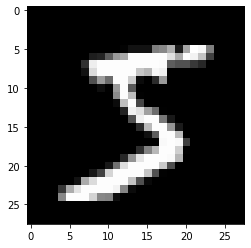

In [33]:
from matplotlib import pyplot 
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap = 'gray')
print(x_train.shape)

In [34]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape

#x_train, x_train.shape, y_train.min(), y_train.max()

print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [35]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [36]:
print(weights)
print(bias)

tensor([[ 0.0835,  0.0340,  0.0441,  ...,  0.0169,  0.0099,  0.0106],
        [-0.0062,  0.0043, -0.0097,  ..., -0.0013,  0.0179,  0.0286],
        [ 0.0281, -0.0279, -0.0499,  ...,  0.0174, -0.0558,  0.0699],
        ...,
        [-0.0359, -0.0118, -0.0127,  ..., -0.0029, -0.0187, -0.0648],
        [-0.0368, -0.0651,  0.0421,  ...,  0.0289, -0.0165,  0.0392],
        [-0.0459, -0.0654,  0.0235,  ...,  0.0283,  0.0763, -0.0112]],
       requires_grad=True)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [37]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [38]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions

print(preds[0], preds.shape)

tensor([-2.2345, -2.4004, -2.0948, -2.4728, -2.1531, -2.0935, -2.4086, -2.4636,
        -3.1251, -1.9918], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [39]:
def nll(input, target):
#     print(range(target.shape[0]))
#     print(target)
#     print(input)
#     print(input[range(target.shape[0]),target])
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [40]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.4620, grad_fn=<NegBackward>)


In [41]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [42]:
print(accuracy(preds, yb))

tensor(0.0469)


In [57]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 1  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        print(loss_func(model(xb), yb), accuracy(model(xb), yb),i)
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

tensor(0.2290, grad_fn=<NegBackward>) tensor(0.9531) 0
tensor(0.1966, grad_fn=<NegBackward>) tensor(0.9844) 1
tensor(0.4231, grad_fn=<NegBackward>) tensor(0.9062) 2
tensor(0.3124, grad_fn=<NegBackward>) tensor(0.9062) 3
tensor(0.3737, grad_fn=<NegBackward>) tensor(0.8906) 4
tensor(0.0984, grad_fn=<NegBackward>) tensor(0.9688) 5
tensor(0.1879, grad_fn=<NegBackward>) tensor(0.9219) 6
tensor(0.4523, grad_fn=<NegBackward>) tensor(0.9062) 7
tensor(0.1968, grad_fn=<NegBackward>) tensor(0.9219) 8
tensor(0.3837, grad_fn=<NegBackward>) tensor(0.9219) 9
tensor(0.3298, grad_fn=<NegBackward>) tensor(0.9531) 10
tensor(0.1970, grad_fn=<NegBackward>) tensor(0.9375) 11
tensor(0.2964, grad_fn=<NegBackward>) tensor(0.9062) 12
tensor(0.5279, grad_fn=<NegBackward>) tensor(0.8594) 13
tensor(0.4005, grad_fn=<NegBackward>) tensor(0.8906) 14
tensor(0.2711, grad_fn=<NegBackward>) tensor(0.8906) 15
tensor(0.6134, grad_fn=<NegBackward>) tensor(0.8594) 16
tensor(0.6355, grad_fn=<NegBackward>) tensor(0.7969) 17
te

In [58]:
print(yb)
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor([9, 3, 7, 0, 9, 0, 8, 5, 5, 2, 4, 5, 0, 8, 4, 8])
tensor(0.0717, grad_fn=<NegBackward>) tensor(1.)


In [59]:
print(y_valid.size())

torch.Size([10000])


In [60]:
xv = x_valid[0:10000]
yv = y_valid[0:10000]

print(accuracy(model(xv), yv))

tensor(0.9200)
